<a href="https://colab.research.google.com/github/aksaraf/PortfolioProjects/blob/main/1000_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is taken from [Udemy Tableau 2022 Advanced: Master Tableau in Data Science](https://www.udemy.com/course/tableau10-advanced/)

My goal here is to recreate the analysis done in tableau using python.

Porject info can be found [here](https://www.artofvisualization.com/pages/tableau-advanced)

**1. Importing the python libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

**2. Uploading the excel file**

We have two sheets (Overview & Financials) in the excel file so let us upload it separately and then combine it together for anaylsis

In [2]:
overview_data = pd.read_excel("P11-1000-Startups.xlsx", sheet_name = 'Overview')
overview_data.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC"
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI"


In [3]:
#let us check the number of rows and columns
overview_data.shape

(1000, 9)

In [4]:
financials_data = pd.read_excel("P11-1000-Startups.xlsx", sheet_name = 'Financials')
financials_data.head()

,ID,Name,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [5]:
#let us check the number of rows and columns
financials_data.shape

(1000, 13)

**3. Combining the two sheets(datasets)**

In [6]:
data = pd.merge(overview_data, financials_data, on=['ID', 'Name'])
data.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,2015 Revenue,2015 Expenses,2015 Profit,2015 Growth %,2014 Revenue,2014 Expenses,2014 Profit,2014 Growth %,2013 Revenue,2013 Expenses,2013 Profit
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,10684526.90,1130700.06,9553826.84,3.34,2463739,194747.86,2268991.14,4.10,483086.08,43394.44,439691.64
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,9016542.89,804035.40,8212507.49,0.65,5448571,239226.90,5209344.10,0.41,3864234.75,91714.44,3772520.31
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,12456641.64,2149297.00,10307344.65,5.20,2007778,335126.93,1672651.07,4.23,383896.37,112257.41,271638.96
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",7746272.07,1044375.49,6701896.58,3.17,1857830,247048.76,1610781.24,0.56,1190916.67,625442.66,565474.01
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",10725585.46,2694644.42,8030941.04,3.12,2604017,615040.85,1988976.15,2.39,768146.61,222962.86,545183.75


In [7]:
#let us check the number of rows and columns
data.shape

#overview_data has 9 columns and financials_data has 13 columns. 
#as name and ID is common columns between the two, 20 columns for merged dataset looks correct.

(1000, 20)

**4. Analyzing the dataset**

4.1 Number of columns having one or more null

In [8]:
data.isnull().any().sum()

6

4.2 Number of startups founded in each year

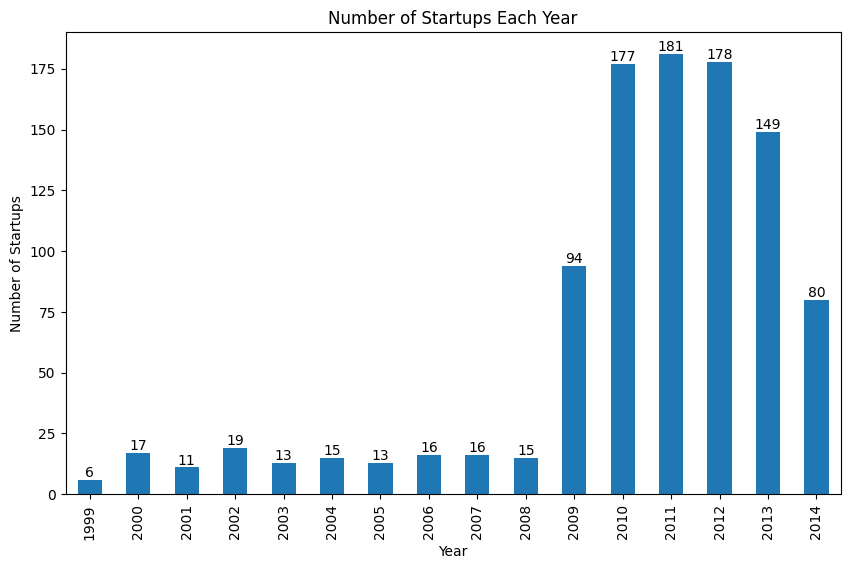

In [9]:
# Group the data by the "Year" column and count the number of startups in each year
startup_count = data.groupby('Year Founded').size()

# Plot the bar char
fig, ax = plt.subplots(figsize=(10, 6))
startup_count.plot(kind='bar', ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Each Year')

# Add values above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

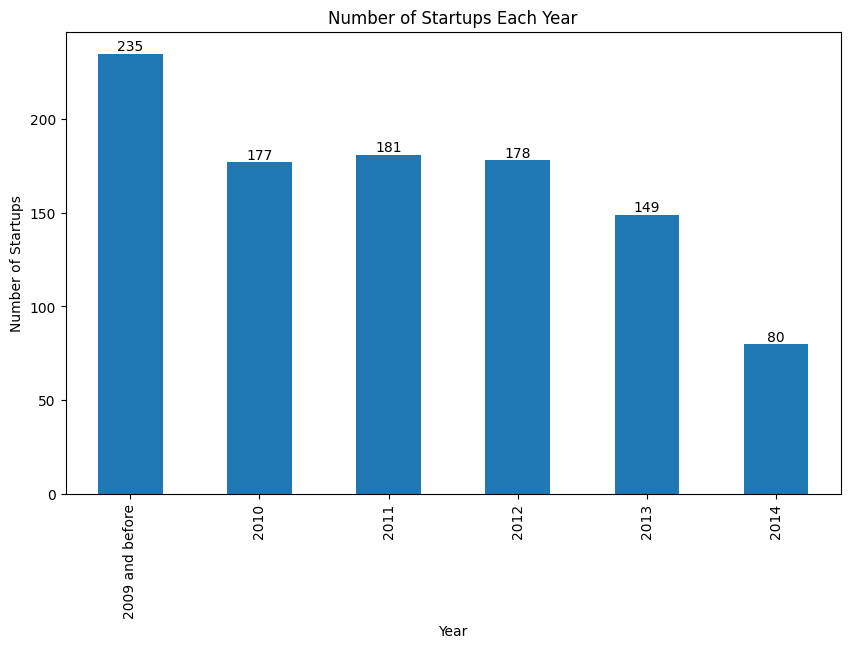

In [10]:

# Group the data by the "Year Founded" column and count the number of startups in each year
startup_count = data.groupby('Year Founded').size()

# Create a modified startup count series
modified_startup_count = startup_count.copy()

# Combine years before 2009 into a single bar
years_before_2009 = startup_count.loc[startup_count.index <= 2009]
combined_count = years_before_2009.sum()
modified_startup_count = modified_startup_count.drop(years_before_2009.index)
modified_startup_count.loc['2009 and before'] = combined_count

# Reorder the index to make "2009 and before" the first element
modified_startup_count = modified_startup_count.reindex(['2009 and before'] + list(modified_startup_count.index[:-1]))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
modified_startup_count.plot(kind='bar', ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Each Year')

# Add values above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


4.2 Number of employees in each industry

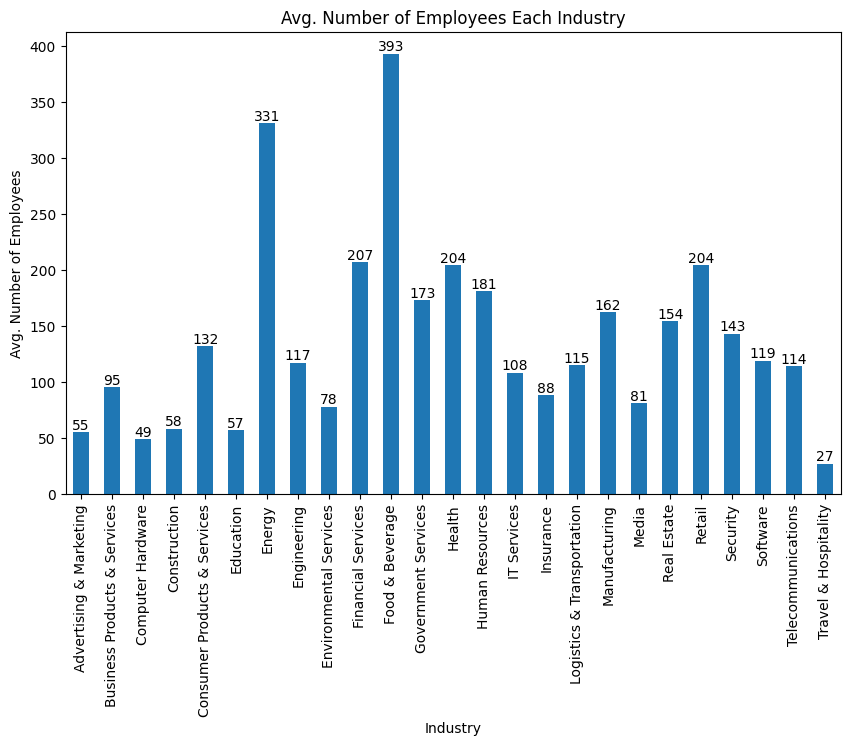

In [26]:
# Group the data by the "Year Founded" column and count the number of startups in each year
average_employees = round(data.groupby('Industry')['Employees'].mean(),0)
average_employees = average_employees.astype(int)
#print(employees_count)

# Plot the bar char
fig, ax = plt.subplots(figsize=(10, 6))
average_employees.plot(kind='bar', ax=ax)
plt.xlabel('Industry')
plt.ylabel('Avg. Number of Employees')
plt.title('Avg. Number of Employees Each Industry')

# Add values above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()
